Transformaciones con Kernels y kernel trick --- 10:00 min
===

* *10:00 min* | Última modificación: Septiembre 24, 2021 | [YouTube](https://youtu.be/ZmwMMF5ioIY)

Estas metodologías permiten transformar el espacio de entrada (las características) a un espacio no lineal, con el fin de hacer el problema tratable por las metodologías disponibles.

En el siguiente ejemplo, las dos clases no son linealmente separables. Mediante la transformación a un espacio dimensional mayor:

$$
(x_1, \; x_2) \to (x_1, \; x_2, \; x_1^2 + x_2^2)
$$

las clases se hacen linealmente separables. Note que explicitamente se están computando nuevas columnas en el dataset cuando se agrega la nueva columna $x_1^2 + x_2^2$.

![kernel_transf.png](assets/kernel_transf.png)

Desde el punto de vista conceptual, existe un número infinito de transformaciones que podrían aumentar la dimensionalidad de los datos, pero muchas de ellas son imprácticas y costosas computacionalmente.

En los métodos de kernel, se soluciona este problema al representar los datos con una matriz $K$ de $n \times n$ (donde $n$ es la cantidad de ejemplos del dataset), donde el elemento $k_{ij}$ corresponde a una comparación de la similitud entre los ejemplos (o patrones) $x_i$ y $x_j$. Esto se conoce con el nombre de **kernel trick**.

![pairwise_metrics.png](assets/pairwise_metrics.png)

Una función kernel es una función cuyas entradas son los patrones del dataset y retorna su producto punto.

Si $\mathbf{x}$ y $\mathbf{z}$ son dos filas del dataset (patrones) y $\phi()$ es una función, entonces una función kernel se define como:

$$
k(\mathbf{x}, \mathbf{z}) = \phi(\mathbf{x})^T \cdot \phi(\mathbf{z})
$$


Como ejemplo, considere el siguiente kernel lineal:

$$
k(x,y) = x^Ty
$$

para:

In [1]:
x = [
    [1, 2],
    [3, 4],
    [5, 6],
]

entonces  será igual a:

$$
k(x_1, x_1) = 1 \times 1 + 2 \times 2  = 5
$$

$$
k(x_1, x_2) = 1 \times 3 + 2 \times 4 = 11
$$ 

y asi sucesivamente.

**Kernel Lineal**

$$
k(x, y) = x^Ty
$$

In [2]:
from sklearn.metrics.pairwise import linear_kernel

linear_kernel(X=x, Y=x)

array([[ 5., 11., 17.],
       [11., 25., 39.],
       [17., 39., 61.]])

In [3]:
linear_kernel(X=x)

array([[ 5., 11., 17.],
       [11., 25., 39.],
       [17., 39., 61.]])

**Kernel polinomial**

$$
k(x, y) = (\gamma x^T y + c_0)^2
$$

In [4]:
from sklearn.metrics.pairwise import polynomial_kernel

polynomial_kernel(
    X=x,
    Y=x,
    degree=2,
    gamma=1,
    coef0=0,
)

array([[  25.,  121.,  289.],
       [ 121.,  625., 1521.],
       [ 289., 1521., 3721.]])

**Kernel sigmoidal** 

$$
k(x, y) = \tanh(\gamma x^T y + c_0)
$$

In [5]:
from sklearn.metrics.pairwise import sigmoid_kernel

sigmoid_kernel(
    X=x,
    Y=x,
    gamma=1,
    coef0=0,
)

array([[0.9999092, 1.       , 1.       ],
       [1.       , 1.       , 1.       ],
       [1.       , 1.       , 1.       ]])

**Kernel RBF**

$$
k(x, y) = \exp \left(-\gamma ||x - y||^2  \right) 
$$

In [6]:
from sklearn.metrics.pairwise import rbf_kernel

rbf_kernel(
    X=x,
    Y=x,
    gamma=1,
)

array([[1.00000000e+00, 3.35462628e-04, 1.26641655e-14],
       [3.35462628e-04, 1.00000000e+00, 3.35462628e-04],
       [1.26641655e-14, 3.35462628e-04, 1.00000000e+00]])

**Kernel Laplaciano**

$$
k(x, y) = \exp \left(-\gamma ||x - y||_1  \right) 
$$

donde $ ||x - y||_1$ representa la distancia de Manhattan entre los dos puntos.

In [7]:
from sklearn.metrics.pairwise import laplacian_kernel

laplacian_kernel(
    X=x,
    Y=x,
    gamma=1,
)

array([[1.00000000e+00, 1.83156389e-02, 3.35462628e-04],
       [1.83156389e-02, 1.00000000e+00, 1.83156389e-02],
       [3.35462628e-04, 1.83156389e-02, 1.00000000e+00]])

**Kernel Chi-cuadrado**

$$
k(x, y) = \exp 
\left(
-\gamma 
\sum_i 
\frac{(x_i - y_i)^2}{x_i+y_i}
\right)
$$

In [8]:
from sklearn.metrics.pairwise import chi2_kernel

chi2_kernel(
    X=x,
    Y=x,
    gamma=1,
)

array([[1.        , 0.1888756 , 0.00940356],
       [0.1888756 , 1.        , 0.40656966],
       [0.00940356, 0.40656966, 1.        ]])

---

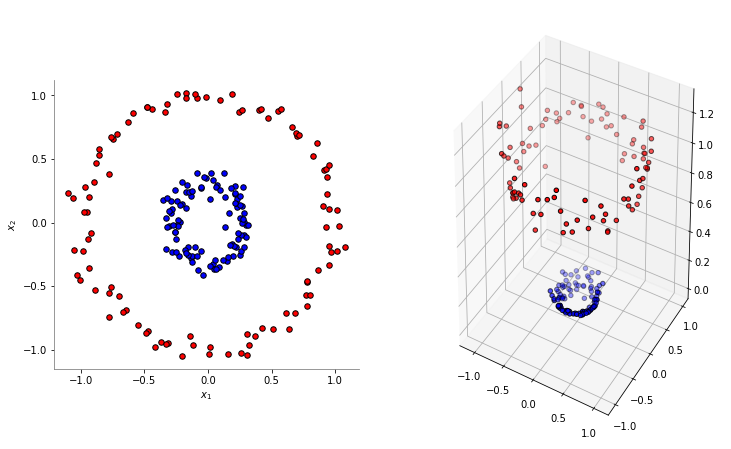

In [9]:
def fig1():

    import matplotlib.pyplot as plt
    import numpy as np
    from sklearn.datasets import make_circles

    np.random.seed(0)

    X, y = make_circles(n_samples=200, factor=0.3, noise=0.05)

    plt.figure(figsize=(12, 8))

    plt.subplot(1, 2, 1, aspect="equal")

    reds = y == 0
    blues = y == 1

    plt.scatter(X[reds, 0], X[reds, 1], c="red", s=30, edgecolor="k")
    plt.scatter(X[blues, 0], X[blues, 1], c="blue", s=30, edgecolor="k")

    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")

    X_transf = np.c_[X, X[:, 0] ** 2 + X[:, 1] ** 2]

    plt.gca().spines["left"].set_color("gray")
    plt.gca().spines["bottom"].set_color("gray")
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)

    ax = plt.subplot(1, 2, 2, projection="3d")
    ax.scatter(
        X_transf[reds, 0],
        X_transf[reds, 1],
        X_transf[reds, 2],
        marker="o",
        c="red",
        edgecolor="k",
    )
    ax.scatter(
        X_transf[blues, 0],
        X_transf[blues, 1],
        X_transf[blues, 2],
        marker="o",
        c="blue",
        edgecolor="k",
    )

    # plt.savefig("assets/kernel_transf.png")
    plt.close()


fig1()